In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3 style="color:#FF8C00">Titanic Spaceship<h3>

In [2]:
spacedf = pd.read_csv('./train.csv')  #read data
spacedf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
spacedf.duplicated().value_counts()

False    8693
dtype: int64

In [4]:
spacedf.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<h5 style="color:#FF8C00">Fix Missing values<h5>

In [5]:
spacedf.HomePlanet.value_counts()  

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [6]:
spacedf.HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [7]:
spacedf.HomePlanet.fillna(value='Earth', inplace=True)
spacedf.HomePlanet.isnull().sum()


0

In [8]:
spacedf.CryoSleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [9]:
spacedf.CryoSleep.fillna(value='False', inplace=True)
spacedf.CryoSleep.isnull().sum()

0

In [10]:

spacedf.drop(columns=['Cabin', 'Name'], inplace=True)  #drop columns 

In [11]:
spacedf.Destination.describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [12]:
spacedf.Destination.fillna(value='TRAPPIST-1e', inplace=True)
spacedf.Destination.isnull().sum()

0

In [13]:
spacedf.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [14]:
spacedf.Age.median()

27.0

<AxesSubplot:xlabel='Age'>

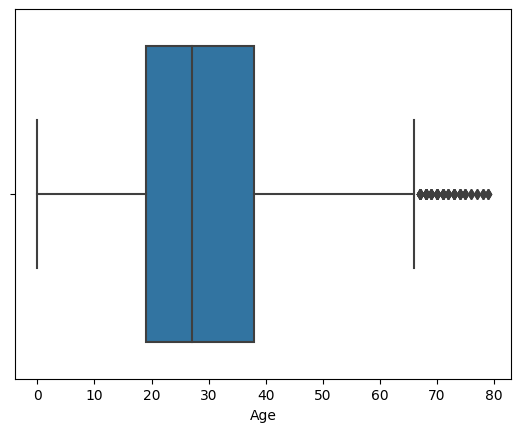

In [15]:
sns.boxplot(x=spacedf.Age)

In [16]:
spacedf.Age.fillna(value= 28.0, inplace=True)
spacedf.Age.isnull().sum()

0

In [17]:
spacedf[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [18]:
list_features= ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']

In [19]:
spacedf.median()

C:\Users\dfran\AppData\Local\Temp\ipykernel_15116\615485152.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spacedf.median()


PassengerId     463001.0
Age                 27.0
VIP                  0.0
RoomService          0.0
FoodCourt            0.0
ShoppingMall         0.0
Spa                  0.0
VRDeck               0.0
Transported          1.0
dtype: float64

In [20]:
for name in list_features:
    spacedf[name].fillna(value=0.0, inplace=True)

In [21]:
spacedf.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [22]:
spacedf.VIP.describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

In [23]:
spacedf.VIP.fillna(value= 'False', inplace=True)
spacedf.VIP.isnull().sum()

0

<h5 style="color:#FF8C00">Decoding<h5>

In [24]:
spacedf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [25]:
spacedf.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [26]:
spacedf['CryoSleep'] = spacedf['CryoSleep'].astype(str)  #transform column to str


In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
ord_enc = OrdinalEncoder()
spacedf['CryoSleeping'] = ord_enc.fit_transform(spacedf[['CryoSleep']])
spacedf.head(100)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,17.0,True,0.0
96,0103_02,Earth,True,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,True,1.0
97,0103_03,Earth,True,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0
98,0105_01,Earth,False,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,0.0


In [29]:
spacedf['VIP'] = spacedf['VIP'].astype(str)

In [30]:
spacedf['VIPs'] = ord_enc.fit_transform(spacedf[['VIP']])
spacedf.head(100)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping,VIPs
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,17.0,True,0.0,0.0
96,0103_02,Earth,True,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,True,1.0,0.0
97,0103_03,Earth,True,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0
98,0105_01,Earth,False,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,False,0.0,0.0


In [31]:
spacedf.drop(columns=['CryoSleep', 'VIP'],inplace=True)
spacedf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping,VIPs
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0
1,0002_01,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0
2,0003_01,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0
3,0003_02,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0.0
4,0004_01,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0


In [32]:
spacedf['Billed'] = spacedf['RoomService'] + spacedf['FoodCourt'] +  spacedf['ShoppingMall'] +  spacedf['Spa'] + spacedf['VRDeck']  
spacedf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping,VIPs,Billed
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0
1,0002_01,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0,736.0
2,0003_01,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,10383.0
3,0003_02,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0.0,5176.0
4,0004_01,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0,1091.0


In [33]:
spacedf['Purchase'] = (spacedf['Billed'] > 0).astype(int)  #0 No purchase, 1 Purchase
spacedf.head(30)

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping,VIPs,Billed,Purchase
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0
1,0002_01,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0,736.0,1
2,0003_01,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,10383.0,1
3,0003_02,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0.0,5176.0,1
4,0004_01,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0,1091.0,1
5,0005_01,Earth,PSO J318.5-22,44.0,0.0,483.0,0.0,291.0,0.0,True,0.0,0.0,774.0,1
6,0006_01,Earth,TRAPPIST-1e,26.0,42.0,1539.0,3.0,0.0,0.0,True,0.0,0.0,1584.0,1
7,0006_02,Earth,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0.0,0.0,0
8,0007_01,Earth,TRAPPIST-1e,35.0,0.0,785.0,17.0,216.0,0.0,True,0.0,0.0,1018.0,1
9,0008_01,Europa,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0.0,0.0,0


In [34]:
spacedf.drop(columns=['Billed'],inplace=True) #drop billed
spacedf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleeping,VIPs,Purchase
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0
1,0002_01,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0,1
2,0003_01,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,1
3,0003_02,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0.0,1
4,0004_01,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0,1


In [35]:
spacedf.dtypes

PassengerId      object
HomePlanet       object
Destination      object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
CryoSleeping    float64
VIPs            float64
Purchase          int32
dtype: object

In [36]:
spacedf.drop(columns=['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck'],inplace=True) #drop billed
spacedf.head()

,PassengerId,HomePlanet,Destination,Age,Transported,CryoSleeping,VIPs,Purchase
0,0001_01,Europa,TRAPPIST-1e,39.0,False,0.0,0.0,0
1,0002_01,Earth,TRAPPIST-1e,24.0,True,0.0,0.0,1
2,0003_01,Europa,TRAPPIST-1e,58.0,False,0.0,1.0,1
3,0003_02,Europa,TRAPPIST-1e,33.0,False,0.0,0.0,1
4,0004_01,Earth,TRAPPIST-1e,16.0,True,0.0,0.0,1


In [37]:
spacedf['HomePlanet'] = spacedf['HomePlanet'].astype(str)

In [38]:
spacedf.HomePlanet.value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [39]:
spacedf = pd.get_dummies(spacedf, columns=['HomePlanet'])  #transform homeplanet to dummies
spacedf.head()

,PassengerId,Destination,Age,Transported,CryoSleeping,VIPs,Purchase,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,TRAPPIST-1e,39.0,False,0.0,0.0,0,0,1,0
1,0002_01,TRAPPIST-1e,24.0,True,0.0,0.0,1,1,0,0
2,0003_01,TRAPPIST-1e,58.0,False,0.0,1.0,1,0,1,0
3,0003_02,TRAPPIST-1e,33.0,False,0.0,0.0,1,0,1,0
4,0004_01,TRAPPIST-1e,16.0,True,0.0,0.0,1,1,0,0


In [40]:
spacedf.dtypes

PassengerId           object
Destination           object
Age                  float64
Transported             bool
CryoSleeping         float64
VIPs                 float64
Purchase               int32
HomePlanet_Earth       uint8
HomePlanet_Europa      uint8
HomePlanet_Mars        uint8
dtype: object

In [41]:
spacedf['CryoSleeping'] = spacedf['CryoSleeping'].astype(int)
spacedf['VIPs'] = spacedf['VIPs'].astype(int)
spacedf.head()

,PassengerId,Destination,Age,Transported,CryoSleeping,VIPs,Purchase,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,TRAPPIST-1e,39.0,False,0,0,0,0,1,0
1,0002_01,TRAPPIST-1e,24.0,True,0,0,1,1,0,0
2,0003_01,TRAPPIST-1e,58.0,False,0,1,1,0,1,0
3,0003_02,TRAPPIST-1e,33.0,False,0,0,1,0,1,0
4,0004_01,TRAPPIST-1e,16.0,True,0,0,1,1,0,0


In [42]:
spacedf = pd.get_dummies(spacedf, columns=['Destination'])  #transform homeplanet to dummies
spacedf.head()

,PassengerId,Age,Transported,CryoSleeping,VIPs,Purchase,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,39.0,False,0,0,0,0,1,0,0,0,1
1,0002_01,24.0,True,0,0,1,1,0,0,0,0,1
2,0003_01,58.0,False,0,1,1,0,1,0,0,0,1
3,0003_02,33.0,False,0,0,1,0,1,0,0,0,1
4,0004_01,16.0,True,0,0,1,1,0,0,0,0,1


In [43]:
spacedf.isnull().sum()

PassengerId                  0
Age                          0
Transported                  0
CryoSleeping                 0
VIPs                         0
Purchase                     0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [44]:
spacedf.dtypes

PassengerId                   object
Age                          float64
Transported                     bool
CryoSleeping                   int32
VIPs                           int32
Purchase                       int32
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
dtype: object

<h5 style="color:#FF8C00">Model train and predict<h5>

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
y_train = spacedf['Transported']
X_train = spacedf.drop(columns=['Transported', 'PassengerId'])

In [47]:
y_train = y_train.astype(int)
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [48]:
model = LogisticRegression()
model

LogisticRegression()

In [49]:
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
model.score(X_train, y_train)

0.7285171977453123

72% accuracy on train model

In [51]:
testdf = pd.read_csv('./test.csv')
testdf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [52]:
testdf.duplicated().sum()

0

In [53]:
testdf.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [54]:
testdf.HomePlanet.value_counts()  

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [55]:
testdf.HomePlanet.fillna(value='Earth', inplace=True)
testdf.HomePlanet.isnull().sum()

0

In [56]:
testdf.CryoSleep.value_counts()  

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [57]:
testdf.CryoSleep = testdf.CryoSleep.astype(str)

In [58]:
testdf.CryoSleep.value_counts()  

False    2640
True     1544
nan        93
Name: CryoSleep, dtype: int64

In [59]:
testdf.CryoSleep.fillna(value='False', inplace=True)
testdf.CryoSleep.isnull().sum()

0

In [60]:

testdf.drop(columns=['Cabin', 'Name'], inplace=True)  #drop columns 

In [61]:
testdf.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [62]:
testdf.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [63]:
testdf.Destination.fillna(value='TRAPPIST-1e', inplace=True)
testdf.Destination.isnull().sum()

0

In [64]:
testdf.Age.describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [65]:
testdf.Age.fillna(value=28.0, inplace=True)
testdf.Age.isnull().sum()

0

In [66]:
testdf.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [67]:
testdf.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [68]:
testdf.VIP.fillna(value='False', inplace=True)
testdf.VIP.isnull().sum()

0

In [69]:
testdf.VIP = testdf.VIP.astype(str)

In [70]:
testdf.VIP.value_counts()

False    4203
True       74
Name: VIP, dtype: int64

In [71]:
testdf.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [72]:
testdf[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,219.266269,439.484296,177.295525,303.052443,310.710031
std,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,78.000000,33.000000,50.000000,36.000000
max,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [73]:
testdf[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].median()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [74]:
test_list = ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
for feature in test_list:
    testdf[feature].fillna(value=0.0, inplace=True)

In [75]:
testdf.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [76]:
testdf.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [77]:
testdf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [78]:
testdf['CryoSleeping'] = ord_enc.fit_transform(testdf[['CryoSleep']])
testdf['VIPs'] = ord_enc.fit_transform(testdf[['VIP']])
testdf.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleeping,VIPs
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0.0,0.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0.0,0.0


In [80]:
testdf.drop(columns=['CryoSleep', 'VIP'], inplace=True)
testdf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleeping,VIPs
0,0013_01,Earth,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0018_01,Earth,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0
2,0019_01,Europa,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0021_01,Europa,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0
4,0023_01,Earth,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,0.0,0.0


In [81]:
testdf['Billed'] = testdf['RoomService'] + testdf['FoodCourt'] +  testdf['ShoppingMall'] +  testdf['Spa'] + testdf['VRDeck']  
testdf['Purchase'] = (testdf['Billed'] > 0).astype(int)
testdf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleeping,VIPs,Billed,Purchase
0,0013_01,Earth,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0018_01,Earth,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,2832.0,1
2,0019_01,Europa,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0021_01,Europa,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,7418.0,1
4,0023_01,Earth,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,645.0,1


In [82]:
testdf.drop(columns=['Billed'], inplace=True)
testdf.head()

,PassengerId,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleeping,VIPs,Purchase
0,0013_01,Earth,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0018_01,Earth,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,0.0,1
2,0019_01,Europa,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0021_01,Europa,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,1
4,0023_01,Earth,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,1


In [83]:
testdf.drop(columns=['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']  , inplace=True)
testdf.head()

,PassengerId,HomePlanet,Destination,Age,CryoSleeping,VIPs,Purchase
0,0013_01,Earth,TRAPPIST-1e,27.0,1.0,0.0,0
1,0018_01,Earth,TRAPPIST-1e,19.0,0.0,0.0,1
2,0019_01,Europa,55 Cancri e,31.0,1.0,0.0,0
3,0021_01,Europa,TRAPPIST-1e,38.0,0.0,0.0,1
4,0023_01,Earth,TRAPPIST-1e,20.0,0.0,0.0,1


In [85]:
testdf = pd.get_dummies(testdf, columns=['HomePlanet', 'Destination']) 
testdf.head()

,PassengerId,Age,CryoSleeping,VIPs,Purchase,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,27.0,1.0,0.0,0,1,0,0,0,0,1
1,0018_01,19.0,0.0,0.0,1,1,0,0,0,0,1
2,0019_01,31.0,1.0,0.0,0,0,1,0,1,0,0
3,0021_01,38.0,0.0,0.0,1,0,1,0,0,0,1
4,0023_01,20.0,0.0,0.0,1,1,0,0,0,0,1


In [86]:
testdf.CryoSleeping = testdf.CryoSleeping.astype(int)
testdf.VIPs = testdf.VIPs.astype(int)

In [87]:
testdf.head()

,PassengerId,Age,CryoSleeping,VIPs,Purchase,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,27.0,1,0,0,1,0,0,0,0,1
1,0018_01,19.0,0,0,1,1,0,0,0,0,1
2,0019_01,31.0,1,0,0,0,1,0,1,0,0
3,0021_01,38.0,0,0,1,0,1,0,0,0,1
4,0023_01,20.0,0,0,1,1,0,0,0,0,1


In [88]:
X_test = testdf.drop(columns=['PassengerId'])

In [98]:
y_predict = model.predict(X_test)
y_predict = y_predict.astype(bool)
y_predict

array([ True, False,  True, ...,  True, False,  True])

In [96]:
prediction = pd.DataFrame(columns=['PassengerId', 'Transported'])
prediction.head()

,PassengerId,Transported


In [100]:
prediction['PassengerId'] = testdf['PassengerId']
prediction['Transported'] = y_predict
prediction.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
prediction.to_csv('./prediction.csv', index=False)